In [1]:
# Import packages
import numpy as np
import utils
import matplotlib.pyplot as plt
import random

In [2]:
# Defining dataset
features = np.array([[1,0], [0,2], [1,1], [1,2], [1,3], [2,2], [2,3], [3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

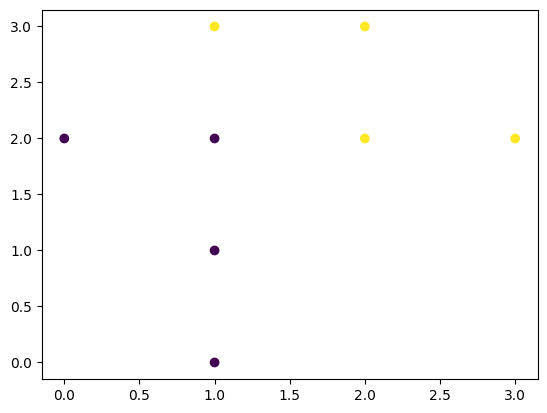

In [3]:
# Plotting dataset
plt.scatter(x=features[:, 0], y=features[:, 1], c=labels)
plt.show()

In [4]:
def score(weights, bias, features):
    return np.dot(features, weights) +  bias

In [5]:
def step(x):
    if x >= 0:
        return 1
    else:
        return 0
    
def prediction(weights, bias, features):
    return step(score(weights, bias, features))

In [6]:
def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

In [7]:
def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [8]:
def perceptron_trick(weights, bias, features, label, learning_rate=0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        # Updates the weights and biases using perceptron trick
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

In [9]:
weights = [1,2]
bias = -4
for i in range(len(features)):
    print(prediction(weights, bias, features[i]), error(weights, bias, features[i], labels[i]))

0 0
1 0
0 0
1 1
1 0
1 0
1 0
1 0


In [10]:
perceptron_trick(weights, bias, features[6], 0)

([0.98, 1.97], -4.01)

In [14]:
def perceptron_algorithm(features, labels, learning_rate=0.01, epochs=200):
    # Initialize the weights
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    # An array to store errors
    errors = []
    # Repeats the process as many times as the number of epochs 
    for epoch in range(epochs):
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        # Picks random point in the dataset
        i = random.randint(0, len(features)-1)
        # Applies the perceptron algorithm to update the weights and the bias of our model
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    plt.plot(range(epochs), errors)
    plt.title('Error')
    plt.show()
    return weights, bias, errors

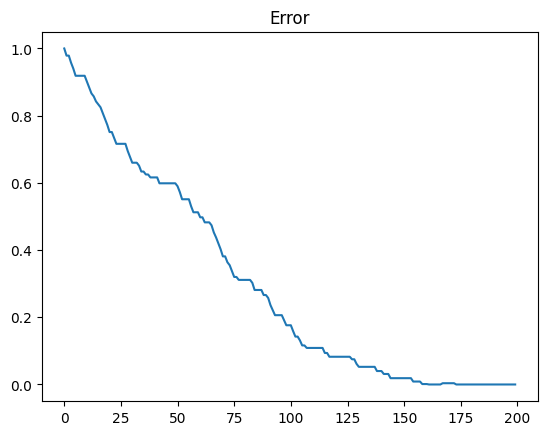

In [15]:
# Let's run the algorithm
weights, bias, errors = perceptron_algorithm(features, labels)